Which Factors Influence the Price of Health Insurance?


Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

## Import libraries


In [5]:
#import libraries

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Read data

In [6]:
#read data
data = pd.read_csv('insurance.csv')
#check head of it

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
#check how many values are missing (NaN) before we apply the methods below 
count_nan = data.isnull().sum() # the number of missing values for every column

    print(count_nan[count_nan > 0])

print(count_nan)

bmi    5
dtype: int64
age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64


In [28]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

print(data.head(15))

#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data.isnull().sum() # the number of missing values for every column

print(count_nan[count_nan > 0])

    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  39.820000         0     no  sou

<AxesSubplot:xlabel='region', ylabel='count'>

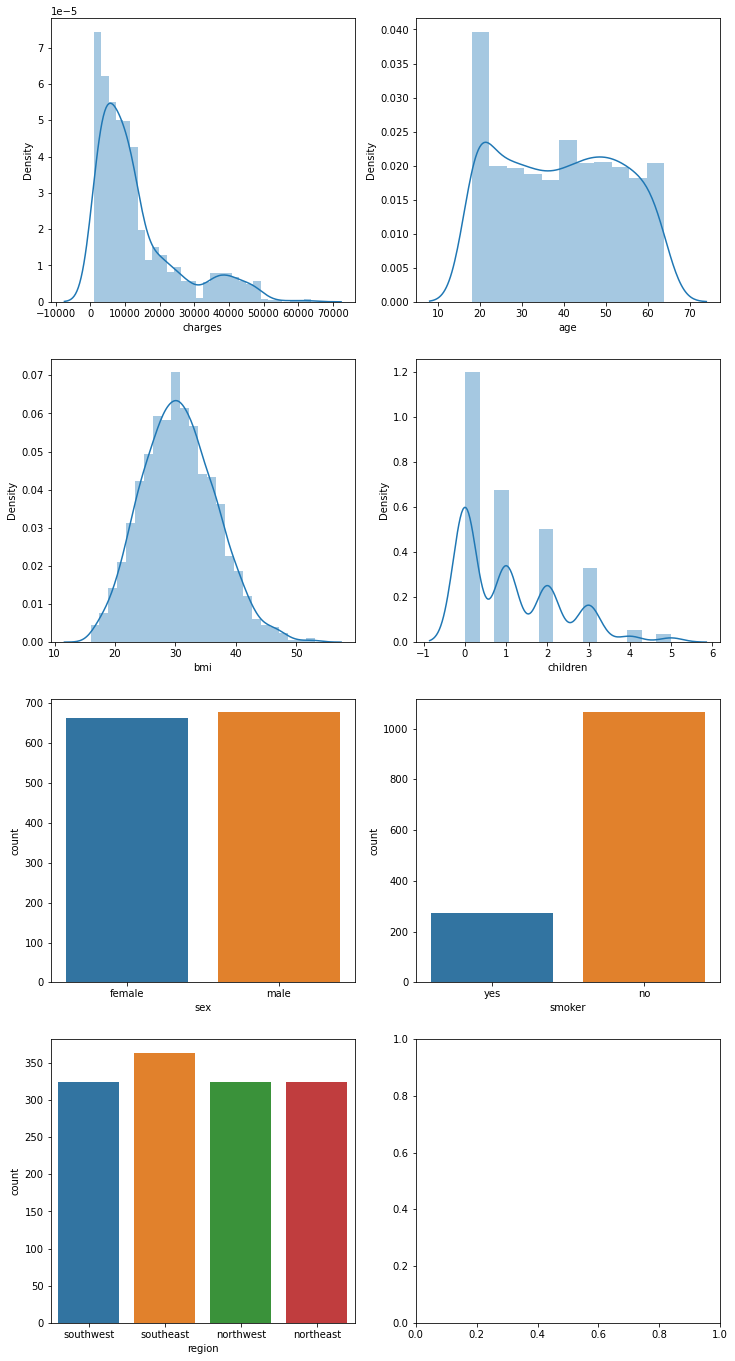

In [29]:
figure, ax = plt.subplots(4,2, figsize=(12,24))

#See the distrubution of the data
sns.distplot(data['charges'],ax= ax[0,0])
sns.distplot(data['age'],ax=ax[0,1])
sns.distplot(data['bmi'],ax= ax[1,0])
sns.distplot(data['children'],ax= ax[1,1])


sns.countplot(data['sex'],ax=ax[2,0])
sns.countplot(data['smoker'],ax= ax[2,1])
sns.countplot(data['region'],ax= ax[3,0])

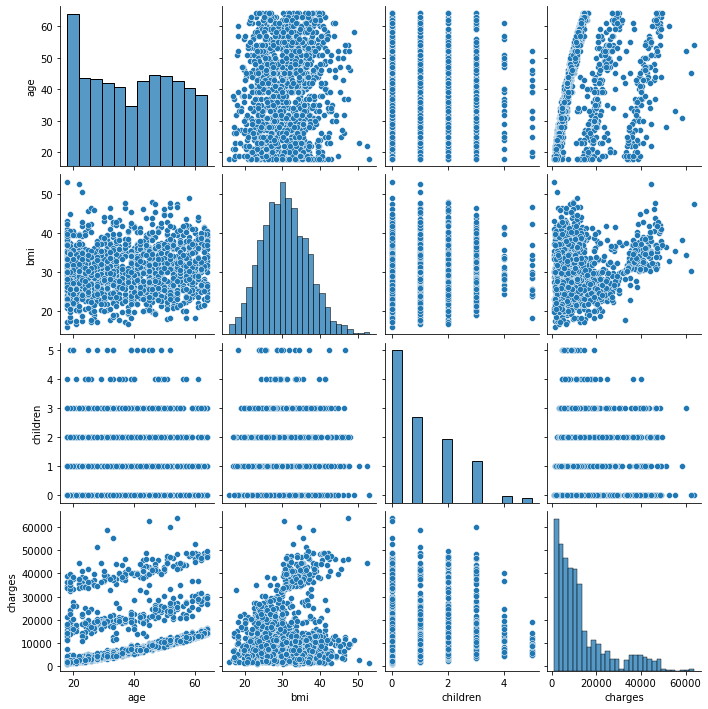

In [5]:
#visualizeing skewness
sns.pairplot(data)

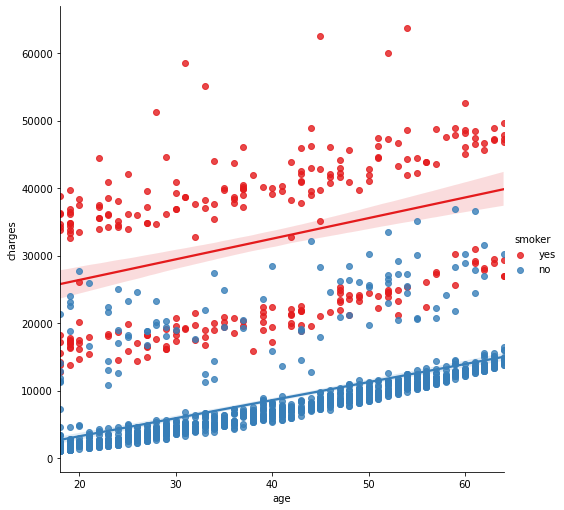

In [7]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data,
               palette="Set1", height = 7)
plt.show(sns)



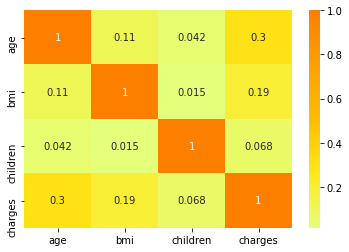

,age,bmi,children,charges
age,1.000000,0.109090,0.042469,0.299008
bmi,0.109090,1.000000,0.014688,0.193817
children,0.042469,0.014688,1.000000,0.067998
charges,0.299008,0.193817,0.067998,1.000000


In [8]:
#Lets look at correlation:

corr = data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)
corr

In [2]:
#preprocessing data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
label_enc = LabelEncoder()
enc_sex_smoker= data[['sex', 'smoker']].apply(LabelEncoder().fit_transform)
enc_sex_smoker


#ohe = OneHotEncoder() 

#data2 = ohe.fit_transform(data[['region']])
#pd.DataFrame(data=data2)



#one hot encoder = ohe

#create ndarray for one hot encodoing (sklearn)
region = data.iloc[:,5:6].values #ndarray

## ohe for region
ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()

#region
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']

print("Sklearn one hot encoder results for region:")  
print(region[0:10])
print(enc_sex_smoker)



Sklearn one hot encoder results for region:
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0
      sex  smoker
0       0       1
1       1       0
2       1       0
3       1       0
4       1       0
...   ...     ...
1333    1       0
1334    0       0
1335    0       0
1336    0       0
1337    0       1

[1338 rows x 2 columns]


**Convert categorical variable into Numbers**

**Label encoder – two distinct values**
<br>
**One hot encoder – three or more distinct values**




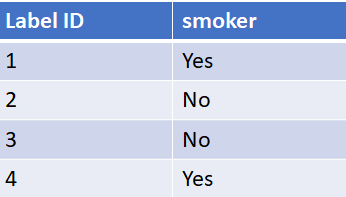

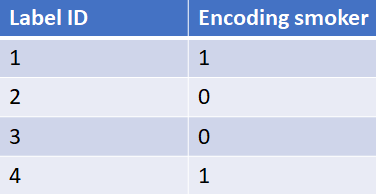

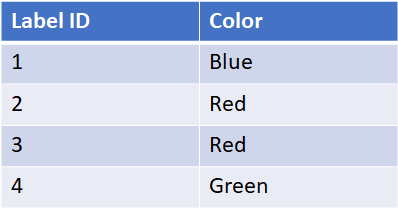

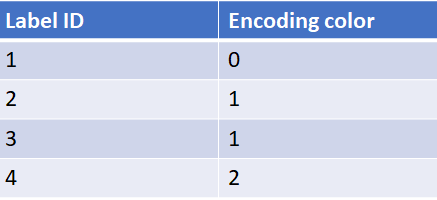

**note: 2 >1 it seems green is greater than red. we cannot make such categorical correlations between categorical variable**

**One hot encoding**



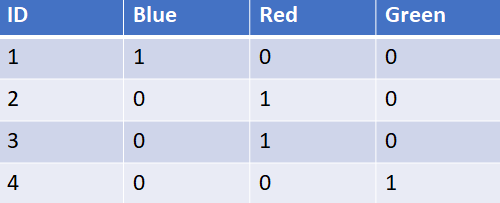



In [32]:
#putting the data together:

##take the numerical data from the original data
X_num = data[['age', 'bmi', 'children']].copy()

##take the encoded data and add to numerical data
X_final = pd.concat([X_num, enc_sex_smoker, region], axis = 1)


#define y as being the "charges column" from the original dataset
y_final = data[['charges']].copy()



#Test train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.50, random_state = 0 )
#X_num


X_final
#y_final


,age,bmi,children,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,0,1,0.0,0.0,0.0,1.0
1,18,33.770,1,1,0,0.0,0.0,1.0,0.0
2,28,33.000,3,1,0,0.0,0.0,1.0,0.0
3,33,22.705,0,1,0,0.0,1.0,0.0,0.0
4,32,28.880,0,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [33]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler


##normalized scaler (fit transform on train, fit only on test)
#n_scaler = MinMaxScaler()
#X_train = n_scaler.fit_transform(X_train.astype(np.float))
#X_test= n_scaler.transform(X_test.astype(np.float))


#standard scaler (fit transform on train, fit only on test)


#scenario 2 
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float)) #scaling on 80 % data

X_test= s_scaler.transform(X_test.astype(np.float))  #scaling on 20 % data


x_train_final_scaled=  pd.DataFrame(X_train)
x_test_final_scaled  =  pd.DataFrame(X_test)



#scenario one
#s_scaler = StandardScaler()
#x_final_scaled  =  s_scaler.fit_transform(X_final)      # scale without splitting (entire dataset) using fit transform 

#scaled_final_dataset =  pd.DataFrame(data=x_final_scaled)
#stochastic nature 
#scaled_final_dataset



#x_train_final_scaled
#x_test_final_scaled

**Standard scaler(standardize) vs MinMax scaler(normalize)**


Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. Scaling the data means it helps to Normalize the data within a particular range.

``note: tree based algorithms does not require scaling``

When MinMaxScaler is used the it is also known as Normalization and it transform all the values in range between (0 to 1) formula is ``x = [(value - min)/(Max- Min)]``

StandardScaler comes under Standardization and its value ranges between (-3 to +3) formula is ``z = [(x - x.mean)/Std_deviation]``

``Note: when to use which ``

``MinMaxscaler``

Preserves the shape of the original distribution. Doesn't reduce the importance of outliers. Default range for MinMaxScaler is 0 to 1. MinMaxScaler is a good place to start unless you know you want your feature to have a normal distribution or want outliers to have reduced influence.


``StandardScaler``
Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). If you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval. 

**Note: check this below link to see the effect of different scaling**

<a href="https://drive.google.com/file/d/1CVTNKKdSIxs7PP7ZPRj60fIIPrbsfPjA/view?usp=sharing">Different Scaling</a>


``fit_transform vs tranform``

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.
We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case.

``transform()``

Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.



In [34]:

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error 

lr = LinearRegression().fit(X_train,y_train)

#evaluate on train data
#y_train_pred = lr.predict(X_train)
#evalaute on test data

y_test_pred = lr.predict(X_test)

#print score
print("coefficients are:",lr.coef_)
print('---------------')
print("intercept is:",lr.intercept_)
print('---------------')



print("r2 score is:",lr.score(X_test, y_test))
mse  = mean_squared_error(y_test, y_test_pred)
rmse  =  np.sqrt(mse)
print(rmse)


coefficients are: [[3577.74960253 2217.30457107  646.13772078 -150.10369699 9520.21491994
   244.78860013   98.81389736 -138.89944565 -188.64164189]]
---------------
intercept is: [13474.57146505]
---------------
r2 score is: 0.7651196216956215
5891.252122645664


In [35]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error 

lr = LinearRegression().fit(X_train,y_train)

s_scaler = StandardScaler()

X_train = s_scaler.fit_transform(X_train.astype(np.float)) #scaling on 80 % data

X_test= s_scaler.transform(X_test.astype(np.float))  #scaling on 20 % data


x_train_final_scaled=  pd.DataFrame(X_train)
x_test_final_scaled  =  pd.DataFrame(X_test)
#evaluate on train data
#y_train_pred = lr.predict(X_train)
#evalaute on test data

y_test_pred = lr.predict(x_train_final_scaled)

#print score
print("coefficients are:",lr.coef_)
print('---------------')
print("intercept is:",lr.intercept_)
print('---------------')



print("r2 score is:",lr.score(X_test, y_test))
mse  = mean_squared_error(y_test, y_test_pred)
rmse  =  np.sqrt(mse)
print(rmse)

coefficients are: [[3577.74960253 2217.30457107  646.13772078 -150.10369699 9520.21491994
   244.78860013   98.81389736 -138.89944565 -188.64164189]]
---------------
intercept is: [13474.57146505]
---------------
r2 score is: 0.7651196216956215
16671.350224221842
